In [2]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 5

In [5]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_images):
#     print("Collecting image {}".format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [6]:
#!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\0108s\.labelmerc


In [4]:
import tensorflow as tf
import numpy as np
import json
from matplotlib import pyplot as plt

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
images = tf.data.Dataset.list_files('data\\train\\images\\*.jpg')

In [7]:
images.as_numpy_iterator().next()

b'data\\train\\images\\3dc7a8ca-57a0-11ee-b126-bc17b8c2fd9d.jpg'

In [10]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [13]:
images = images.map(load_image)

In [14]:
images.as_numpy_iterator().next()

array([[[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [155, 141, 138],
        [155, 141, 138],
        [155, 141, 138]],

       [[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [155, 141, 138],
        [156, 142, 139],
        [155, 141, 138]],

       [[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [156, 142, 141],
        [156, 142, 141],
        [156, 142, 141]],

       ...,

       [[106,  75,  54],
        [105,  74,  53],
        [104,  73,  52],
        ...,
        [ 76,  63,  55],
        [ 75,  62,  56],
        [ 75,  61,  58]],

       [[104,  73,  53],
        [104,  73,  53],
        [104,  73,  53],
        ...,
        [ 76,  63,  55],
        [ 75,  62,  56],
        [ 75,  62,  56]],

       [[105,  74,  54],
        [105,  74,  54],
        [105,  74,  54],
        ...,
        [ 78,  65,  56],
        [ 77,  64,  58],
        [ 76,  63,  57]]

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

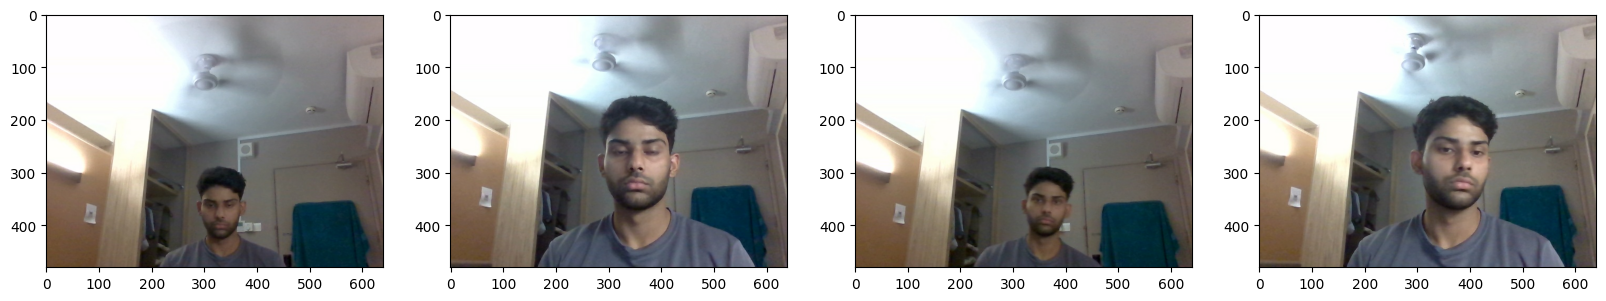

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()


In [ ]:
#train - 38, val - 11, test - 6 

In [ ]:
# for folder in ['train', 'test', 'val']:
#     for file in os.listdir(os.path.join('data', folder, 'images')):
#         filename = file.split('.')[0]+ '.json'
#         exisiting_filepath = os.path.join('data', 'labels', filename)
#         if os.path.exists(exisiting_filepath):
#             new_filepath = os.path.join('data', folder, 'labels', filename)
#             os.replace(exisiting_filepath, new_filepath)


In [8]:
import albumentations as alb

In [19]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                         bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [21]:
t_img = cv2.imread(os.path.join('data', 'train', 'images', '3d2bd52b-57a0-11ee-96e9-bc17b8c2fd9d.jpg'))

In [27]:
with open(os.path.join('data', 'train', 'labels', '3d2bd52b-57a0-11ee-96e9-bc17b8c2fd9d.json'), 'r') as f:
    label = json.load(f)
label['shapes'][0]['points']

[[275.3763440860215, 152.0967741935484],
 [446.8817204301075, 371.98924731182797]]

In [29]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords

[0.4302755376344086,
 0.31686827956989255,
 0.698252688172043,
 0.7749775985663082]

In [31]:
augmented = augmentor(image=t_img, bboxes=[coords], class_labels=['face'])

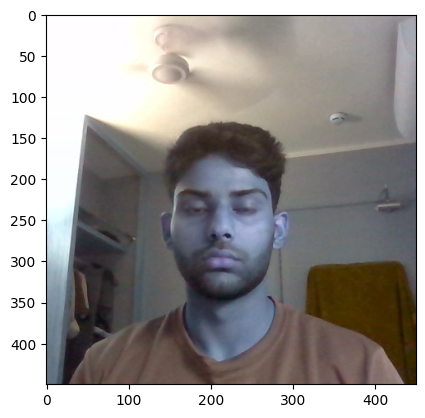

In [33]:
plt.imshow(augmented['image'])

In [38]:
# for partition in ['train', 'test', 'val']:
#     for image in os.listdir(os.path.join('data', partition, 'images')):
#         img = cv2.imread(os.path.join('data', partition, 'images', image))

#         coords = [0,0,0.000001, 0.000001]
#         label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)
#             coords[0] = label['shapes'][0]['points'][0][0]
#             coords[1] = label['shapes'][0]['points'][0][1]
#             coords[2] = label['shapes'][0]['points'][1][0]
#             coords[3] = label['shapes'][0]['points'][1][1]
#             coords = list(np.divide(coords, [640, 480, 640, 480]))
        
#         try:
#             for x in range(20):
#                 augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
#                 cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image

#                 if os.path.exists(label_path):
#                     if len(augmented['bboxes']) == 0:
#                         annotation['bbox'] = [0,0,0,0]
#                         annotation['class'] = 0
#                     else:
#                         annotation['bbox'] = augmented['bboxes'][0]
#                         annotation['class'] = 1
#                 else:
#                     annotation['bbox'] = [0,0,0,0]
#                     annotation['class'] = 0
                
#                 with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
#                     json.dump(annotation, f)
#         except Exception as e:
#             print(e)

            

In [11]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/225)

In [12]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/225)

In [13]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/225)

In [14]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    
    return [label['class']], label['bbox']

In [15]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [16]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0999, 0.1096, 0.536 , 0.725 ], dtype=float16))

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(760, 760, 120, 120, 220, 220)

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(1000)
train = train.batch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(200)
test = test.batch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(300)
val = val.batch(4)

In [21]:
data_samples = train.as_numpy_iterator()

In [22]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


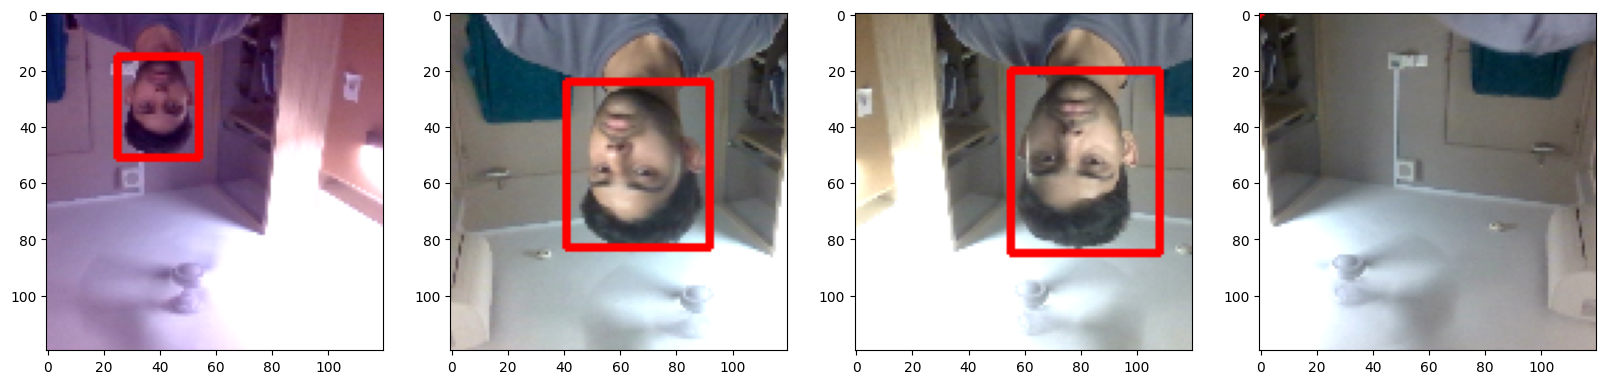

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    i = res[0][idx]
    c = res[1][1][idx]

    cv2.rectangle(i, tuple(np.multiply(c[:2], [120,120]).astype(int)),
                  tuple(np.multiply(c[2:], [120,120]).astype(int)), (255,0,0), 2)
    ax[idx].imshow(i)

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [25]:
vgg = VGG16(include_top=False)

In [69]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [27]:
facetracker = build_model()

In [28]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [29]:
X, y = train.as_numpy_iterator().next()

In [30]:
batches_per_epoch = len(train)
lr_decay = (1/0.75 - 1)/batches_per_epoch

In [31]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [32]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [33]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [34]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [35]:
model = FaceTracker(facetracker)

In [36]:
model.compile(opt, classloss, regressloss)

In [42]:
hist = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3


190/190 [==============================] - 156s 818ms/step - total_loss: 0.0082 - class_loss: 2.1441e-04 - regress_loss: 0.0080 - val_total_loss: 0.3227 - val_class_loss: 0.0207 - val_regress_loss: 0.3123
Epoch 2/3
190/190 [==============================] - 151s 790ms/step - total_loss: 0.0065 - class_loss: 5.1274e-05 - regress_loss: 0.0065 - val_total_loss: 0.1485 - val_class_loss: 0.0013 - val_regress_loss: 0.1479
Epoch 3/3
190/190 [==============================] - 172s 901ms/step - total_loss: 0.0058 - class_loss: 3.0075e-05 - regress_loss: 0.0058 - val_total_loss: 0.0750 - val_class_loss: 5.7909e-05 - val_regress_loss: 0.0750


In [43]:
hist.history

{'total_loss': [0.005031505599617958,
  0.0032897102646529675,
  0.00896531157195568],
 'class_loss': [1.1667785656754859e-05,
  5.304828846419696e-06,
  0.0004887137329205871],
 'regress_loss': [0.005025671795010567,
  0.0032870578579604626,
  0.00872095488011837],
 'val_total_loss': [0.32269835472106934,
  0.14850391447544098,
  0.0750381201505661],
 'val_class_loss': [0.020747845992445946,
  0.0012566070072352886,
  5.790912109659985e-05],
 'val_regress_loss': [0.3123244345188141,
  0.1478756070137024,
  0.07500916719436646]}

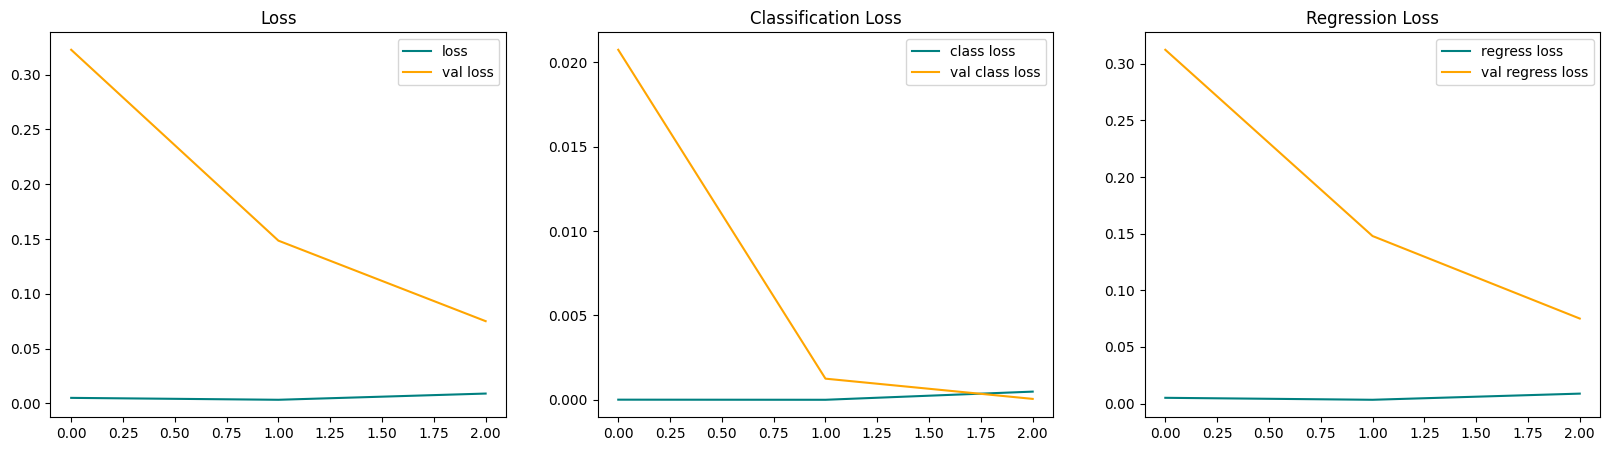

In [44]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [47]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 129ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1 is out of bounds for axis 0 with size 1

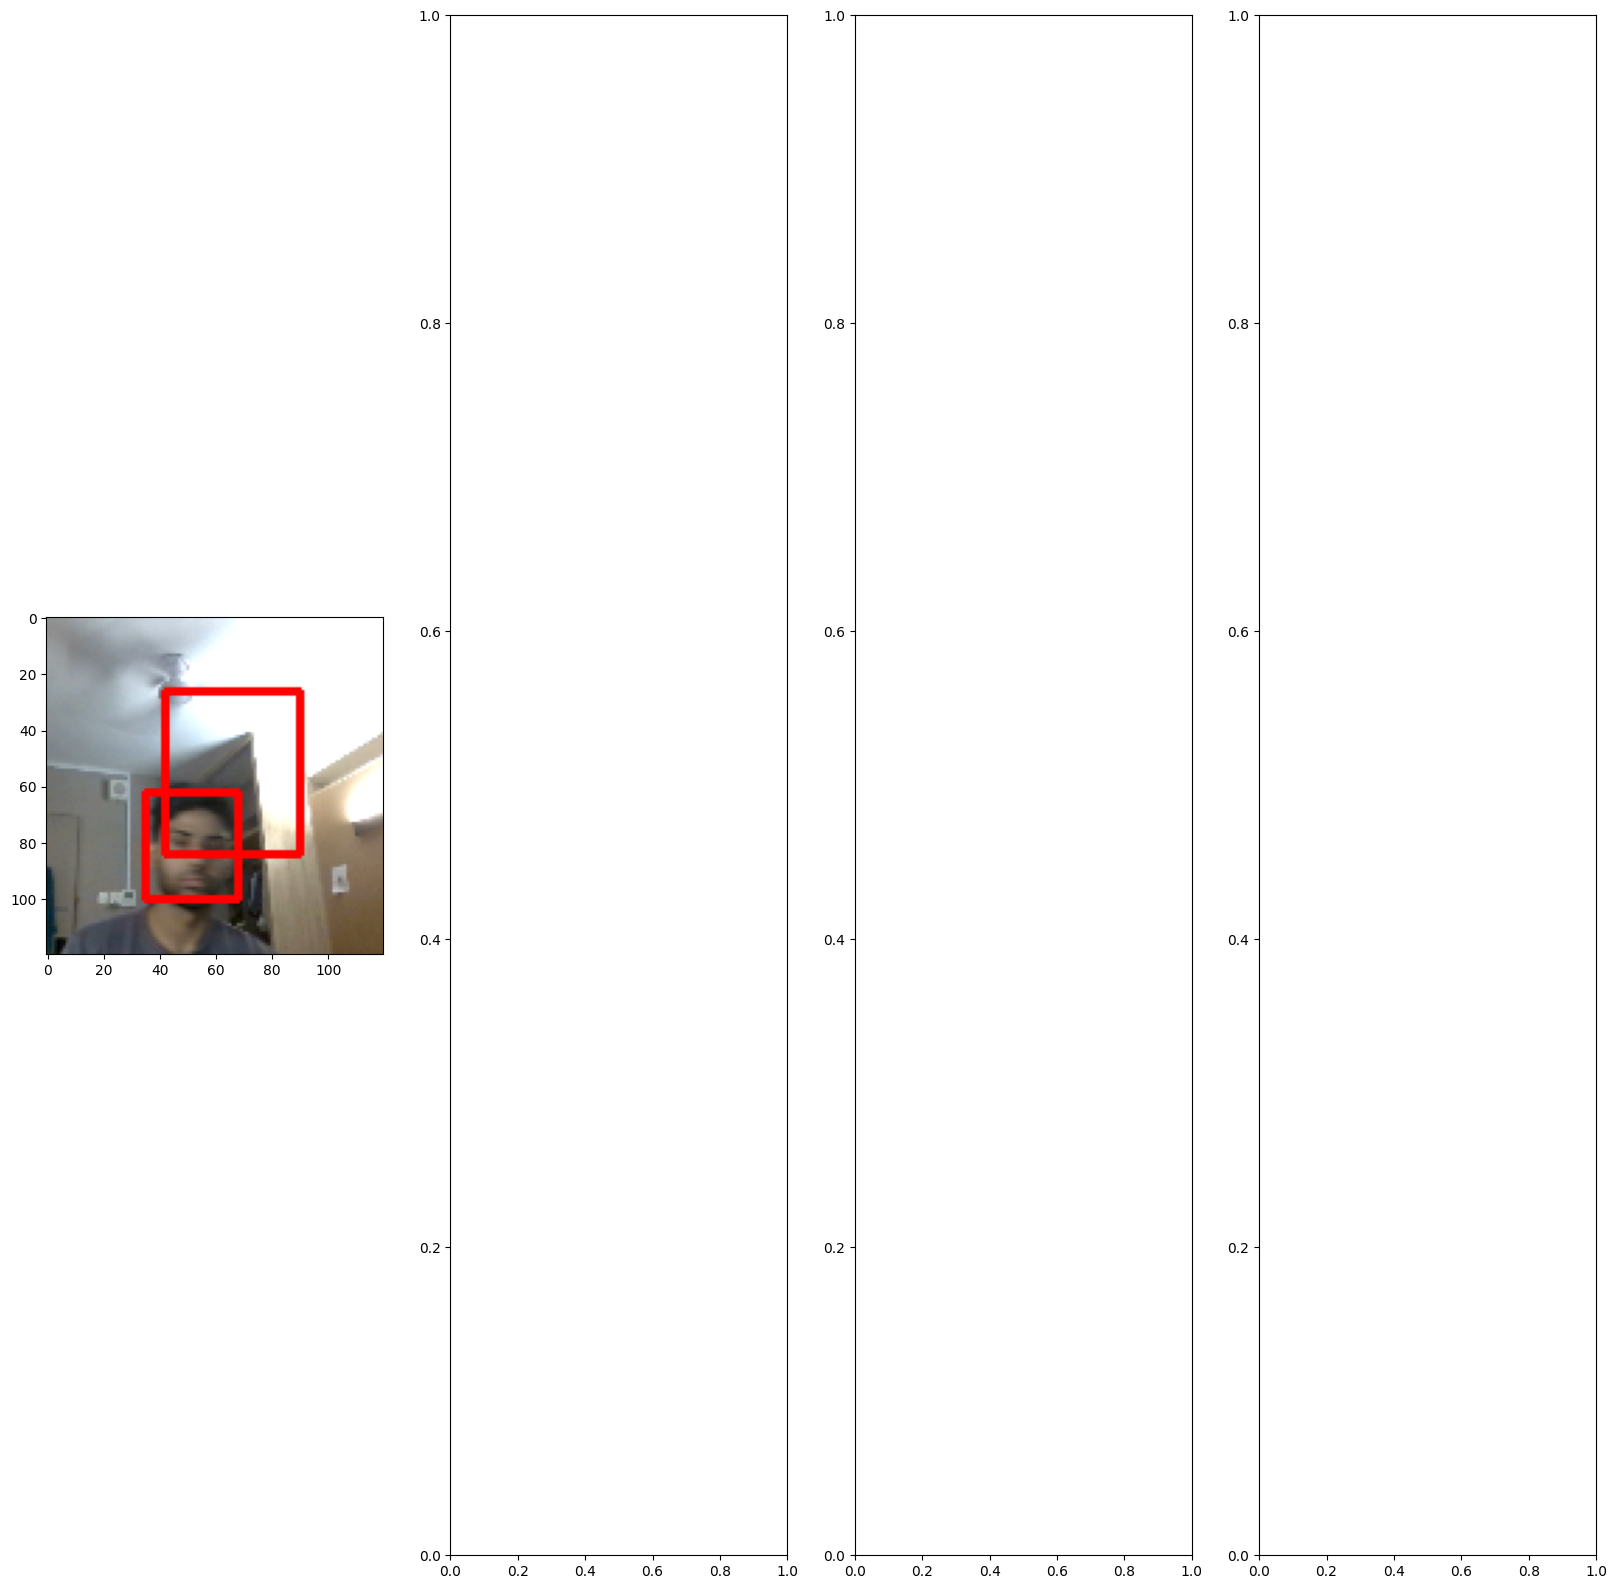

In [52]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [51]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 92ms/step


In [50]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')
facetracker = load_model('facetracker.h5')

c:\Users\0108s\Projects\FaceDetection\facedetection\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
